In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Validation Accuracy for learning rate 0.1: 29.565217391304348%
Validation Accuracy for learning rate 0.01: 70.43478260869566%
Validation Accuracy for learning rate 0.001: 69.56521739130434%
Validation Accuracy for learning rate 0.0001: 57.391304347826086%
Best learning rate: 0.01
Best validation accuracy: 70.43478260869566%
Test Accuracy with the best learning rate: 52.58620689655172%


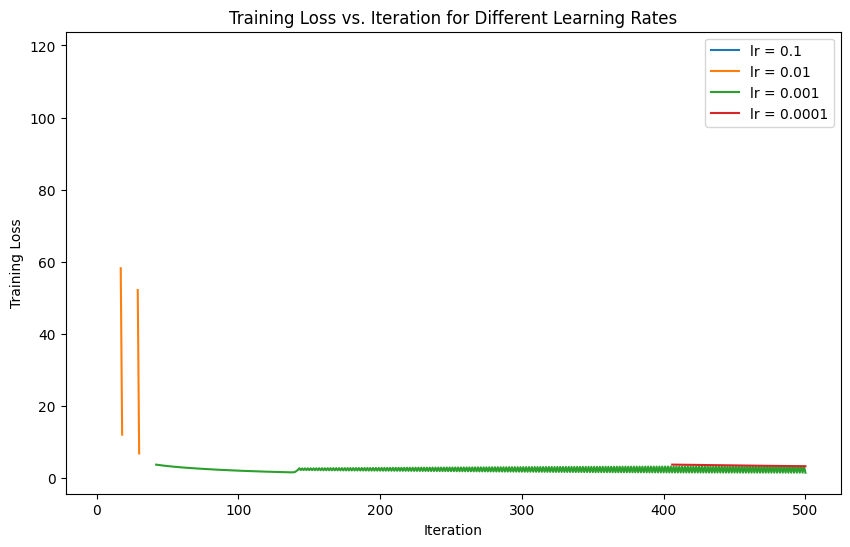

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore', over='ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataset = np.genfromtxt(url, delimiter=',')
X = dataset[:, :-1]
y = dataset[:, -1]

def split_dataset(data, train_ratio, val_ratio, test_ratio):
    data_size = len(data)
    train_size = int(train_ratio * data_size)
    val_size = int(val_ratio * data_size)
    train_set = data[:train_size]
    val_set = data[train_size:train_size+val_size]
    test_set = data[train_size+val_size:]
    return train_set, val_set, test_set

train_set, val_set, test_set = split_dataset(dataset, 0.7, 0.15, 0.15)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(num_features):
    np.random.seed(0)
    theta = np.random.rand(num_features + 1)
    return theta

def binary_cross_entropy(y, h):
    return -1 * (y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    history = []

    for itr in range(1, num_iterations + 1):
        total_loss = 0
        gradient = np.zeros(len(theta))

        for i in range(m):
            X_i = X[i]
            y_i = y[i]

            z = np.dot(X_i, theta)
            h = sigmoid(z)

            loss = binary_cross_entropy(y_i, h)
            total_loss += loss

            error = h - y_i
            gradient += X_i * error

        total_loss /= m
        history.append(total_loss)

        gradient /= m
        theta -= learning_rate * gradient

    return theta, history

X_train = train_set[:, :-1]
y_train = train_set[:, -1]

X_train = np.column_stack((X_train, np.ones(len(X_train))))

learning_rates = [0.1, 0.01, 0.001, 0.0001]
max_iterations = 500
best_lr = None
best_val_acc = 0

history_list = []

for lr in learning_rates:
    theta = initialize_parameters(X_train.shape[1] - 1)
    theta, history = gradient_descent(X_train, y_train, theta, lr, max_iterations)
    history_list.append(history)

    X_val = val_set[:, :-1]
    y_val = val_set[:, -1]
    X_val = np.column_stack((X_val, np.ones(len(X_val))))
    val_correct = 0
    for i in range(len(X_val)):
        z = np.dot(X_val[i], theta)
        h = sigmoid(z)
        y_pred = 1 if h >= 0.5 else 0
        if y_pred == y_val[i]:
            val_correct += 1

    val_acc = val_correct * 100 / len(X_val)
    print(f"Validation Accuracy for learning rate {lr}: {val_acc}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr

print(f"Best learning rate: {best_lr}")
print(f"Best validation accuracy: {best_val_acc}%")

# Test with the best learning rate
X_test = test_set[:, :-1]
y_test = test_set[:, -1]
X_test = np.column_stack((X_test, np.ones(len(X_test))))

test_correct = 0
for i in range(len(X_test)):
    z = np.dot(X_test[i], theta)
    h = sigmoid(z)
    y_pred = 1 if h >= 0.5 else 0
    if y_pred == y_test[i]:
        test_correct += 1

test_acc = test_correct * 100 / len(X_test)
print(f"Test Accuracy with the best learning rate: {test_acc}%")

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, max_iterations + 1), history_list[i], label=f"lr = {lr}")

plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Iteration for Different Learning Rates")
plt.legend()
plt.show()


https://chat.openai.com/share/77acc78d-8d85-4035-9011-596efd2bfe45